<a href="https://colab.research.google.com/github/rayasrujanareddy/ML-LDA-ASSIGNMENT/blob/main/LDA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab Exercise 1: Introduction to LDA for Dimensionality Reduction
Objective: Understand the basic principles of LDA and apply it to reduce the dimensionality of a simple classification dataset.

## 1. Load the Dataset:

 Use the Iris dataset (available in sklearn or seaborn). The dataset has 4 features and 3 classes.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [32]:
# Step 1: Load the Dataset
data = pd.read_csv('/content/iris.csv')
X = data.iloc[:, :-1].values  # Assuming the last column is the target
y = data.iloc[:, -1].values   # Target classes

## 2. Data Standardization:
 Standardize the data so that it has a mean of 0 and a standard deviation of 1.

In [33]:
# Step 2: Data Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [34]:
# Print the first five rows of the standardized data
print("Standardized data:")
print(X_standardized[:5])

Standardized data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


## 3. Apply LDA:
Implement LDA using sklearn&#39;s LinearDiscriminantAnalysis class. Reduce the dimensionality of the dataset to 2
components.

In [35]:
# Step 3: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)

# Print the shape of the transformed data to confirm reduction to 2 components
print(f"Transformed shape with LDA: {X_lda.shape}")

Transformed shape with LDA: (150, 2)


## 4. Visualization:
Create a 2D scatter plot of the transformed data, using different colors for each class.

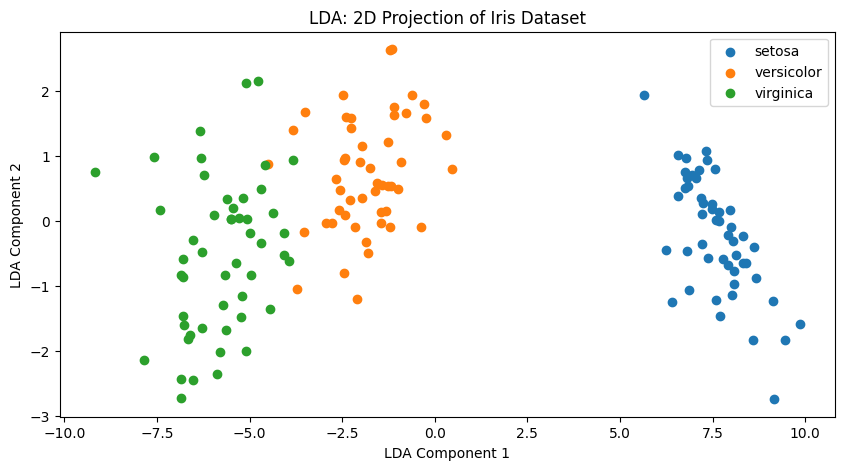

In [36]:
# Step 4: Visualization of LDA-transformed data
plt.figure(figsize=(10, 5))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=label)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA: 2D Projection of Iris Dataset')
plt.legend()
plt.show()

## 5. Compare LDA with PCA:
Plot the first two components from PCA(from the previous lab if done) on the same dataset and compare the
results with LDA.

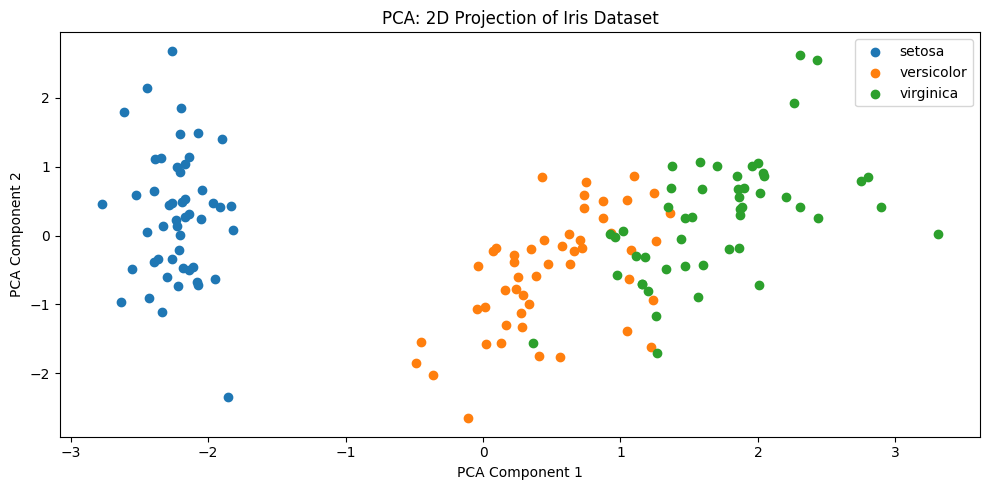

In [37]:
# Step 5: Compare with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualization of PCA-transformed data
plt.figure(figsize=(10, 5))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: 2D Projection of Iris Dataset')
plt.legend()

plt.tight_layout()
plt.show()

## Lab Exercise 2: LDA for Classification

Objective: Learn how LDA can be used as a classifier by applying it to a multi-class classification problem.

## 1. Load the Dataset:

Use the Wine dataset from sklearn, which contains 13 features and 3 classes.

In [38]:
#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/WineQT.csv'
wine_data = pd.read_csv(file_path)

# Prepare features and target
X = wine_data.drop(columns=['quality', 'Id'])  # Remove irrelevant columns
y = wine_data['quality']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Split the Data:

Split the data into training and testing sets (e.g., 70% training, 30% testing).

In [39]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 3. Train an LDA Model:

Use LDA as a classifier by training a LinearDiscriminantAnalysis model on the training data.

In [40]:
# Train an LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

## 4. Evaluate the Model:
Predict the labels on the test set and compute the model&#39;s accuracy, precision, recall, and confusion matrix.

In [41]:
# Evaluate the LDA model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted', zero_division=0)
recall_lda = recall_score(y_test, y_pred_lda, average='weighted', zero_division=0)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)


In [42]:
# Print LDA performance
print("LDA Performance:")
print("Accuracy:", accuracy_lda)
print("Precision:", precision_lda)
print("Recall:", recall_lda)
print("Confusion Matrix:\n", conf_matrix_lda)


LDA Performance:
Accuracy: 0.6239067055393586
Precision: 0.6185348417064812
Recall: 0.6239067055393586
Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   1   5   3   0   0]
 [  2   1 103  34   2   1]
 [  1   2  43  87  12   1]
 [  0   0   3  15  23   0]
 [  0   0   0   2   2   0]]


## 5. Compare with Logistic Regression:
Train a logistic regression model on the same dataset, and compare its performance with the LDA classifier.

In [43]:
# Train a Logistic Regression model with increased max_iter and standardized data
logreg_model = LogisticRegression(max_iter=2000, random_state=42, solver='lbfgs')
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print Logistic Regression performance
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)



Logistic Regression Performance:
Accuracy: 0.6180758017492711
Precision: 0.5921175272390734
Recall: 0.6180758017492711
Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   6   3   0   0]
 [  1   0 107  34   1   0]
 [  0   0  47  90   9   0]
 [  0   0   3  23  15   0]
 [  0   0   0   2   2   0]]


## 6. Visualize Decision Boundaries (Optional):
For an intuitive understanding, visualize the decision boundaries for both the LDA and logistic regression
models in a 2D space (you can reduce the dataset to 2 dimensions using LDA or PCA for visualization
purposes).

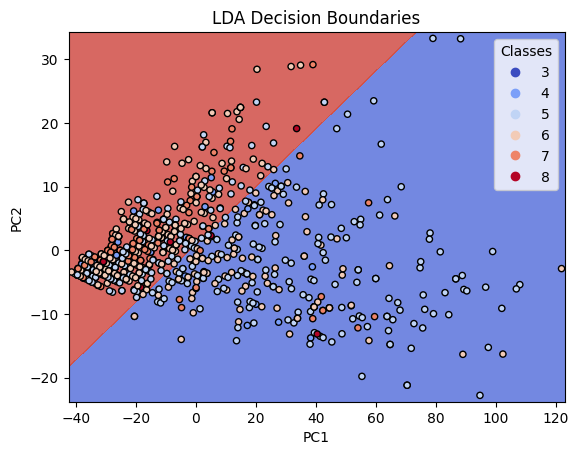

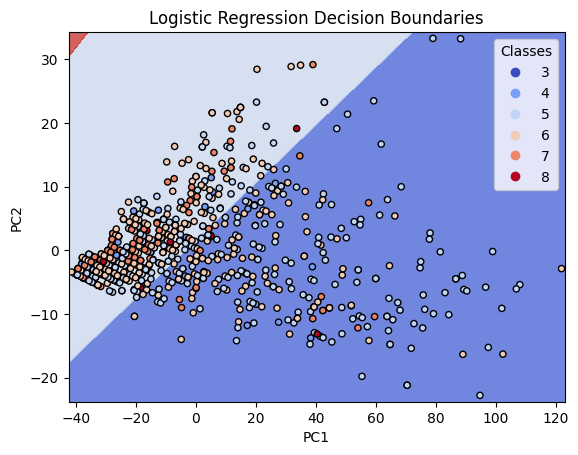

In [44]:
# Optional: Visualize decision boundaries in 2D (using PCA to reduce dimensions)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Plot decision boundaries for LDA and Logistic Regression
def plot_decision_boundaries(model, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.show()

# Plot for LDA model
lda_model_2d = LinearDiscriminantAnalysis()
lda_model_2d.fit(X_train_2d, y_train)
plot_decision_boundaries(lda_model_2d, X_train_2d, y_train, "LDA Decision Boundaries")

# Plot for Logistic Regression model
logreg_model_2d = LogisticRegression(max_iter=1000, random_state=42)
logreg_model_2d.fit(X_train_2d, y_train)
plot_decision_boundaries(logreg_model_2d, X_train_2d, y_train, "Logistic Regression Decision Boundaries")